In [16]:
from IPython import get_ipython


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# same as % matplotlib inline
# only difference is that vscode sees it like this
get_ipython().run_line_magic('matplotlib', 'inline')


In [18]:
df_movies = pd.read_csv('../../data/movie.csv')
df_movies.head()


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [19]:
# Ongewenste kolommen verwijderen
df_movies.drop(["movie_imdb_link", "aspect_ratio"], axis=1, inplace=True)

#Onduidelijke kolomnamen aanpassen
df_movies.rename(columns={'color': 'Colour',
                          'director_name': 'Director',
                          'num_critic_for_reviews': 'Number of critics',
                          'duration': 'Duration',
                          'director_facebook_likes': 'Director FB likes',
                          'actor_3_facebook_likes': 'Actor 3 FB likes',
                          'actor_2_name': 'Actor 2 name',
                          'actor_1_facebook_likes': 'Actor 1 FB likes',
                          'gross': 'Gross',
                          'genres': 'Genres',
                          'actor_1_name': 'Actor 1 name',
                          'movie_title': 'Movie title',
                          'num_voted_users': 'Number of voted users',
                          'cast_total_facebook_likes': 'Total Cast FB likes',
                          'actor_3_name': 'Actor 3 name',
                          'facenumber_in_poster': 'Number of faces on poster',
                          'plot_keywords': 'Plot Keywords',
                          'num_user_for_reviews': 'Number of user reviews',
                          'language': 'Language',
                          'country': 'Country',
                          'content_rating': 'Age rating',
                          'budget': 'Budget',
                          'title_year': 'Release year',
                          'actor_2_facebook_likes': 'Actor 2 FB likes',
                          'imdb_score': 'IMDB Score',
                          'movie_facebook_likes': 'Movie FB likes'}, inplace=True)

# Volgorde kolommen aanpassen
df_movies = df_movies[['Movie title',
                       'Release year',
                       'Director',
                       'Director FB likes',
                       'Gross',
                       'Budget',
                       'Duration',
                       'Language',
                       'Country',
                       'Colour',
                       'Genres',
                       'IMDB Score',
                       'Number of voted users',
                       'Number of critics',
                       'Number of user reviews',
                       'Age rating',
                       'Total Cast FB likes',
                       'Movie FB likes',
                       'Actor 1 name',
                       'Actor 2 name',
                       'Actor 3 name',
                       'Actor 1 FB likes',
                       'Actor 2 FB likes',
                       'Actor 3 FB likes',
                       'Plot Keywords',
                       'Number of faces on poster',
                       ]]

# Datatypen aanpassen
# 1. Floats omzetten naar integers
#  De dataset bevat geen kolommen die dienen te worden bewaard als float, behalve `IMDB Score`
df_movies_IMDB_Score = df_movies["IMDB Score"]  # Tijdelijke kopie van de kolom `IMDB Score`
df_movies = df_movies.drop('IMDB Score', axis=1).fillna(0).astype(int, errors='ignore') # Waarden omzetten naar integers
df_movies.insert(11, "IMDB Score", df_movies_IMDB_Score)  # `IMDB Score` weer toevoegen aan originele DataFrame
del df_movies_IMDB_Score

# 2. De kolom `Release year` omzettten van integers naar het datetime-datatype
df_movies["Release year"] = pd.to_datetime(df_movies["Release year"], format='%Y', errors='coerce')


In [20]:
# NaN-types verwijderen
df_movies.dropna(inplace=True)

# Dubbele titels verwijderen
df_movies.sort_values("Release year", inplace=True)  # Sorteren op uitgavejaar
df_movies.drop_duplicates(subset="Movie title", keep="last", inplace=True)  # Alleen meest recente versie blijft bewaard

# Negatieve waardes verwijderen
num = df_movies._get_numeric_data()
num[num < 0] = 0

 # In hoeverre is de omzet van een film te voorspellen op basis van de populariteit op Facebook en IMDB zelf?
 # Nando

# Q1. Omzet voorspellen op basis van de populariteit
De onderzoeksvraag gaat als volgt.

```In hoeverre is de omzet van een film te voorspellen op basis van de populariteit op Facebook en IMDB zelf?```

Bij deze deelvraag is besloten om de volgorde van de datascience process niet aan te houden. Dat past beter bij deze deelvraag.

# Q1. Data collection

Voor deze onderzoeksvragen wordt er gebruik gemaakt van de volgende features uit `df_movies`:

In [21]:
# Alleen facebook kolommen of IMDB kolommen nodig
features = ['Director FB likes', 'Actor 1 FB likes', 
                'Actor 2 FB likes', 'Gross', 'Total Cast FB likes',
                'Actor 3 FB likes', 'IMDB Score', 'Movie FB likes']
df_Q1 = df_movies.copy()[features]

# Q1. Data Cleaning

Een gedeelte hiervan hebben we in ```3. Data Cleaning``` gedaan. 

Vervolgens moet alle films zonder omzet verwijderd worden

In [22]:
df_Q1 = df_Q1[df_Q1.Gross != 0]

# Q1. Data Exploration & Analysis

In [23]:
df_Q1.describe()

,Director FB likes,Actor 1 FB likes,Actor 2 FB likes,Gross,Total Cast FB likes,Actor 3 FB likes,IMDB Score,Movie FB likes
count,4053.000000,4053.000000,4053.000000,4.053000e+03,4053.000000,4053.000000,4053.000000,4053.000000
mean,751.343696,7261.646681,1849.832223,4.765612e+07,10743.612879,705.323711,6.466815,8510.708611
std,2964.847599,15122.743996,4334.342570,6.737681e+07,18497.475128,1765.048756,1.052312,20669.530607
min,0.000000,0.000000,0.000000,1.620000e+02,0.000000,0.000000,1.600000,0.000000
25%,10.000000,691.000000,334.000000,5.023275e+06,1715.000000,168.000000,5.900000,0.000000
50%,56.000000,1000.000000,643.000000,2.504763e+07,3653.000000,409.000000,6.600000,168.000000
75%,214.000000,12000.000000,957.000000,6.111292e+07,15327.000000,664.000000,7.200000,10000.000000
max,23000.000000,640000.000000,137000.000000,7.605058e+08,656730.000000,23000.000000,9.300000,349000.000000


Er zitten grote verschillen tussen waardes van elke kolom. Aangezien machine learning algoritmes algebraïsche zijn betekend dat een hoog getal meer invloed heeft dan een laag getal. Om dit te voorkomen moet de waardes genormaliseerd worden.

Volgende stap is proberen (lineaire) correlaties te vinden.

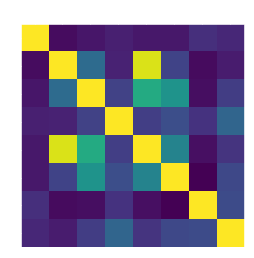

,Director FB likes,Actor 1 FB likes,Actor 2 FB likes,Gross,Total Cast FB likes,Actor 3 FB likes,IMDB Score,Movie FB likes
Director FB likes,1.000000,0.092521,0.118514,0.143584,0.122072,0.122188,0.188547,0.166525
Actor 1 FB likes,0.092521,1.000000,0.388278,0.149980,0.947526,0.251369,0.088821,0.131719
Actor 2 FB likes,0.118514,0.388278,1.000000,0.248378,0.635416,0.544615,0.095042,0.231268
Gross,0.143584,0.149980,0.248378,1.000000,0.235418,0.287172,0.200597,0.366615
Total Cast FB likes,0.122072,0.947526,0.635416,0.235418,1.000000,0.480555,0.099665,0.203754
Actor 3 FB likes,0.122188,0.251369,0.544615,0.287172,0.480555,1.000000,0.062008,0.265960
IMDB Score,0.188547,0.088821,0.095042,0.200597,0.099665,0.062008,1.000000,0.275733
Movie FB likes,0.166525,0.131719,0.231268,0.366615,0.203754,0.265960,0.275733,1.000000


In [24]:
plt.matshow(df_Q1.corr())
plt.show()
df_Q1.corr()

Wat hier uit zichtbaar wordt is:
* Acteur 1 heeft veel invloed op total cast likes
* Acteur 2 heeft aanzienlijk minder invloed dan acteur 1 op de total cast likes
* Movie likes heeft zwak invloed op de omzet


# Q1. Data preperation

Vervolgens is de dataset opgesplitst naar een input(X) en output(y) waar ze vervolgens gesplitst worden naar een train, test en validatie set.

In [25]:
# Split the data to X and y
X = df_Q1.drop(columns=['Gross'])
y = df_Q1['Gross']
assert len(X) == len(y) # make sure that the length of x is the same as the length of y



In [26]:
from sklearn.model_selection import train_test_split # TODO
# Create Train test and validation Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# Doing it twice because you need a validation set as well
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)




# Q1. Model building

Aangezien er zwakke correlatie tussen de input en output is, is een regressie mogelijk.



In [27]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=1, solver="lbfgs", multi_class="auto", max_iter=200)

LR.fit(X_train, y_train)



/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Zoals je ziet geeft hij een Convergence warning en kan het zijn dat deze data niet geschikt is voor een logstic regression model

De volgende stap is de waarde van de voorspelling te bepalen.


In [30]:
import math
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, LR.predict(X_test))
rms = math.sqrt(mse)
score = LR.score(X_test, y_test)

print("RMS: {}".format(rms))
print("MSE: {}".format(mse))
print("Score: {:.4f}".format(score))



RMS: 164610287.85842633
MSE: 2.709654686883398e+16
Score: 0.0000


Na het bekijken van de scores zie je dat dit een erg slecht model is om dit te voorspellen.


### Q1. Model building

Nu we weten dat een logistic regression model niet werkt.

In [35]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

LR.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
import math
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, LR.predict(X_test))
rms = math.sqrt(mse)
score = LR.score(X_test, y_test)

print("RMS: {}".format(rms))
print("MSE: {}".format(mse))
print("Score: {}".format(score))



RMS: 63409936.906523295
MSE: 4020820098489265.0
Score: 0.18675713820172224


Nu er een score is zien je dat dit model het beter doet dan ons logistic regression model

### Q1. Data processing

Nadat er een base score is van dit model kan je normalisatie toevoegen en kijken wat de invloed hier op is.

In [38]:
from scipy import stats
x_scaled = stats.zscore(X)
y_scaled = stats.zscore(y)

Nadat we de X data gescaled hebben door middel van een zscores moeten we dit weer op splitsen naar train, test en validatie sets.

In [39]:
# Create Train test and validation Split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=1)
# Doing it twice because you need a validation set as well
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)


In [40]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
mse = mean_squared_error(y_test, LR.predict(X_test))
rms = math.sqrt(mse)
score = LR.score(X_test, y_test)

print("RMS: {}".format(rms))
print("MSE: {}".format(mse))
print("Score: {}".format(score))


RMS: 0.9412401628909501
MSE: 0.8859330442389823
Score: 0.18675713820172302



Wat we hier bevinden:
* De score is zo goed als gelijk gebleven op vergelijking van de vorige voorspelling met een lineaire regressie
* Mean squared error is in vergelijking stevig naar beneden gegaan

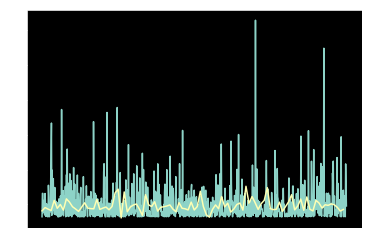

In [44]:
x = np.linspace(0, 100, len(y_test))
plt.plot(x,y_test, LR.predict(X_test)[:100])


### Q1. Model
Nu is een polynomial regression optie.


In [43]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=20)
x_poly = polynomial_features.fit_transform(x_scaled)

In [45]:
# Create Train test and validation Split
X_train, X_test, y_train, y_test = train_test_split(x_poly, y_scaled, test_size=0.2, random_state=1)
# Doing it twice because you need a validation set as well
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

In [61]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

LR.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
mse = mean_squared_error(y_test, LR.predict(X_test))
rms = math.sqrt(mse)
score = LR.score(X_test, y_test)

print("RMS: {}".format(rms))
print("MSE: {}".format(mse))
print("Score: {}".format(score))




RMS: 0.9667893092345882
MSE: 0.9346815684502922
Score: 0.14200839607516325


Dit levert ons een slechter model op. Zo is de MSE omhoog gegaan en de Score naar beneden

# Q1. Communication
## Q1. Definitieve pipeline
Onze definitieve model is een lineaire regressie model waarbij de X en y data gescaled is door middel van z-scores


In [116]:
y = df_Q1['Gross']
y_scaled = stats.zscore(y)

In [70]:
# Create Train test and validation Split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=1)
# Doing it twice because you need a validation set as well
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

In [71]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Test score

In [72]:
mse = mean_squared_error(y_test, LR.predict(X_test))
rms = math.sqrt(mse)
score = LR.score(X_test, y_test)

print("RMS: {}".format(rms))
print("MSE: {}".format(mse))
print("Score: {}".format(score))



RMS: 1.0347068481231008
MSE: 1.0706182615528417
Score: 0.1787609789925002


# Validation score

In [120]:
mse = mean_squared_error(y_val, LR.predict(X_val))
rms = math.sqrt(mse)
score = LR.score(X_val, y_val)

print("RMS: {}".format(rms))
print("MSE: {}".format(mse))
print("Score: {}".format(score))
print("Std: {}".format( df_Q1.Gross.std()))

RMS: 0.835343609306829
MSE: 0.6977989456097602
Score: 0.19843163101434147
Std: 68452990.43875284


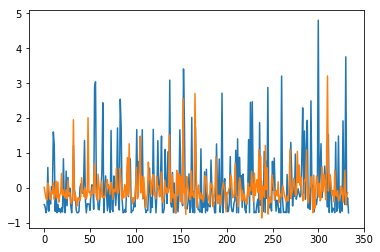

In [121]:
x = np.linspace(0, len(y_val), len(y_val))
plt.plot(x,y_val, LR.predict(X_val))

## Q2. Conclusie

De onderzoeksvraag die beantwoord wordt met behulp van dit model ging als volgt:
```
In hoeverre is de omzet van een film te voorspellen op basis van de populariteit op Facebook en IMDB zelf?
```

Na het onderzoek is gebleken dat het niet gelukt is door middel van een regressie model een betrouwbare voorspelling te maken. Als je ziet hierboven is het gelukt om een model te maken die 19% van de tijd een goede voorspelling is. Dit valt onder verwachting.